Лабораторная работа 2 (Задача кластеризация)

Цель: научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

Дано: excel-файл

Результат: число кластеров, обученная модель

Ход выполнения:

    1.Загрузить данные из файла (использовать библиотеку Pandas).
    2.Визуализировать загруженные данные (диаграмма рассеяния).
    3.Оценить число групп (кластеров).
    4.Выбрать модель кластеризации.
    5.Обучить модель кластеризации на обучающих данных.
    6.Проверить качество полученной модели на тестовых данных.
    7.Визуализировать результат.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

## 1. Загрузить данные из файла (использовать библиотеку Pandas).

In [28]:
df = pd.read_excel('lab2-02.xlsx')
display(df.head())
df.info()

,0,1
0,3.769185,0.147376
1,-3.885548,8.104339
2,-7.411635,-2.326309
3,3.966751,-5.169558
4,-2.009444,8.862075


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


## 2. Визуализировать загруженные данные (диаграмма рассеяния).

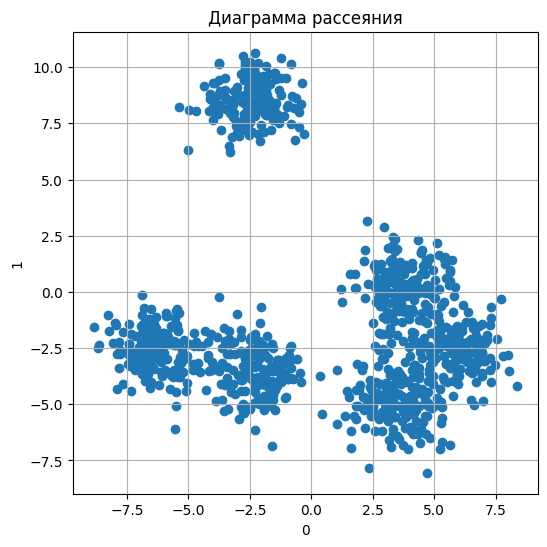

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Диаграмма рассеяния")
plt.grid(True)
plt.show()

## 3. Оценить число групп (кластеров).

Визуально можно заметить 3 группы.

## 4. Выбрать модель кластеризации.

Выберем модель KMeans

In [30]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 21)

## 5. Обучить модель кластеризации на обучающих данных.

In [31]:
k = 3

model = KMeans(n_clusters=k, random_state=21)
model.fit(X_train)

print("центры:")
print(model.cluster_centers_)

центры:
[[-4.34850032 -2.99206111]
 [ 4.26433837 -2.32843312]
 [-2.45930602  8.49497851]]


## 6. Проверить качество полученной модели на тестовых данных.

Воспользуемся коэфициентом силуэта


In [32]:
test_labels = model.predict(X_test)
score_test = silhouette_score(X_test, test_labels)

print("Silhouette score (test):", score_test)

Silhouette score (test): 0.6537035500902746


## 7. Визуализировать результат.

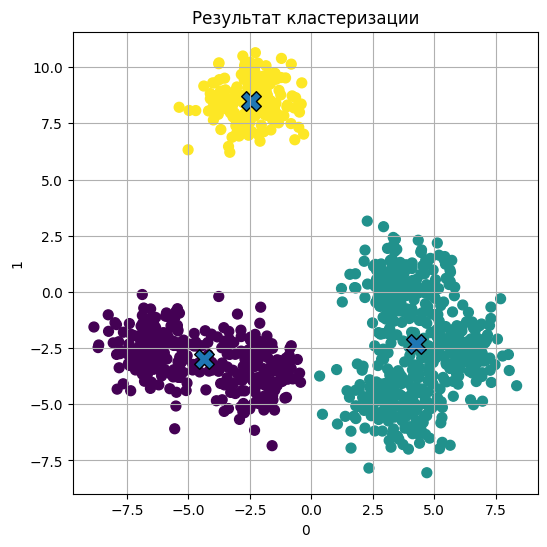

In [33]:
labels = model.predict(df)

plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels, s=50)
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            marker='X', s=200, edgecolor='black')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Результат кластеризации")
plt.grid(True)
plt.show()

Визуализация при разном количестве кластеров

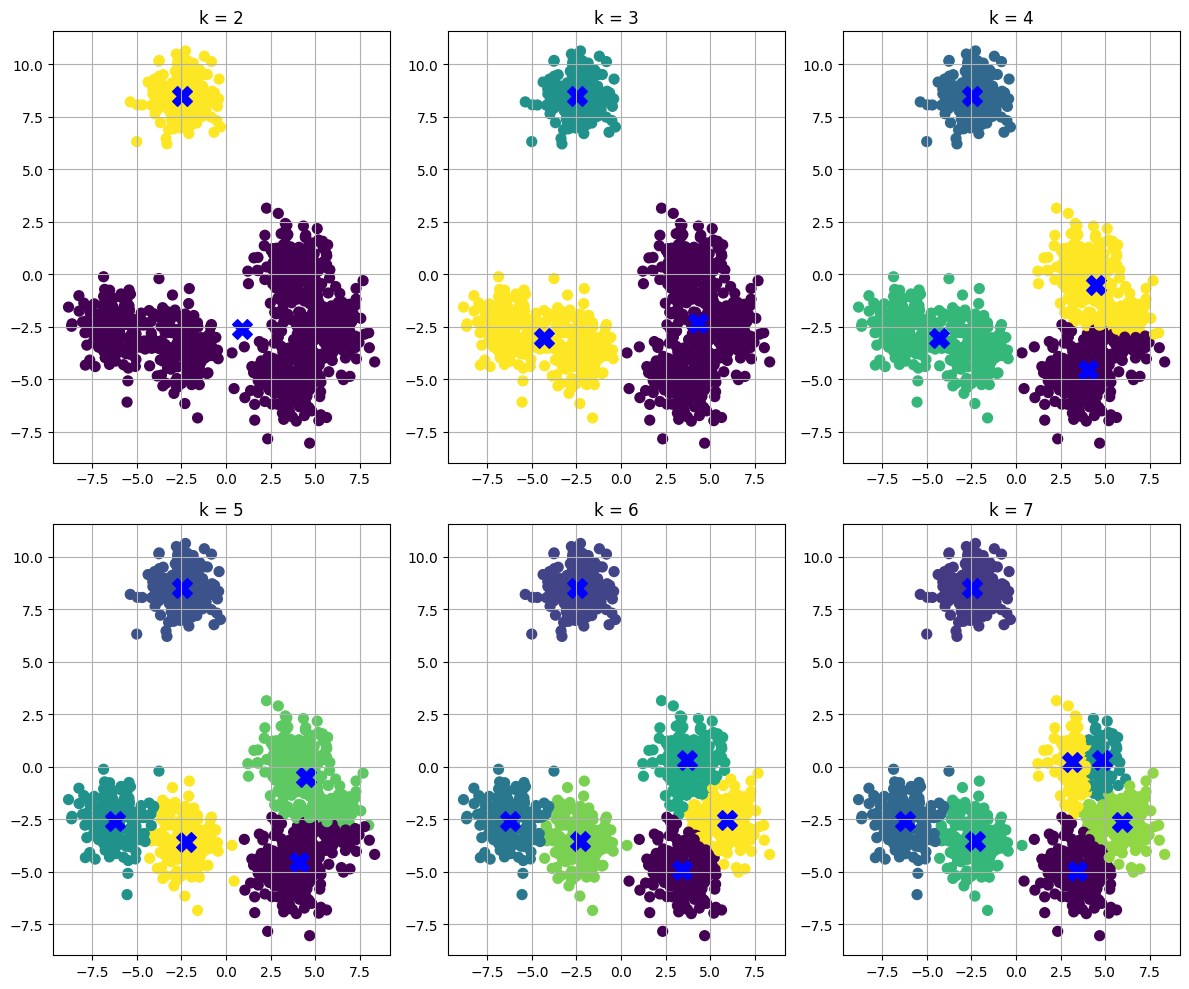

In [37]:
k_values = [2, 3, 4, 5, 6, 7]
X = df.values

plt.figure(figsize=(12, 10))

for i, k in enumerate(k_values, 1):
    model = KMeans(n_clusters=k, random_state=21)
    labels = model.fit_predict(X)
    
    plt.subplot(2, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
    plt.scatter(model.cluster_centers_[:, 0],
                model.cluster_centers_[:, 1],
                c='blue', marker='X', s=200)
    plt.title(f"k = {k}")
    plt.grid(True)

plt.tight_layout()
plt.show()